# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [4]:
len(df_flights)

271940

In [17]:
# Your code to explore the data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
DelDel15                0
dtype: int64

In [18]:
df_flights.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Carrier               object
OriginAirportID        int64
OriginAirportName     object
OriginCity            object
OriginState           object
DestAirportID          int64
DestAirportName       object
DestCity              object
DestState             object
CRSDepTime             int64
DepDelay               int64
DepDel15             float64
CRSArrTime             int64
ArrDelay               int64
ArrDel15               int64
Cancelled              int64
DelDel15               int32
dtype: object

In [20]:
df_flights[df_flights["DepDel15"]==1]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,DelDel15
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,Cleveland,OH,804,35,1.0,1027,33,1,0,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,...,San Francisco,CA,1710,87,1.0,2035,183,1,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,...,Los Angeles,CA,1759,40,1.0,2107,10,0,0,0
13,2013,7,17,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13487,...,Minneapolis,MN,2025,95,1.0,2245,90,1,0,0
16,2013,10,31,4,MQ,11057,Charlotte Douglas International,Charlotte,NC,12953,...,New York,NY,1630,28,1.0,1830,26,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271906,2013,7,23,2,EV,11433,Detroit Metro Wayne County,Detroit,MI,10792,...,Buffalo,NY,1531,49,1.0,1645,116,1,0,0
271924,2013,7,20,6,EV,11433,Detroit Metro Wayne County,Detroit,MI,12264,...,Washington,DC,1008,142,1.0,1138,133,1,0,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,Baltimore,MD,1540,30,1.0,1935,15,1,0,0


In [21]:
df_flights[df_flights["DepDel15"].isnull()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,DelDel15
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,...,Chicago,IL,835,0,NaN,945,0,1,1,0
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,...,Chicago,IL,1719,0,NaN,1738,0,1,1,0
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,...,Chicago,IL,1935,0,NaN,2125,0,1,1,0
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,...,Atlanta,GA,630,0,NaN,809,0,1,1,0
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,...,Cincinnati,OH,1320,0,NaN,1524,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,...,Burbank,CA,1525,0,NaN,1625,0,1,1,0
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,...,Memphis,TN,600,0,NaN,729,0,1,1,0
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,...,Philadelphia,PA,1325,0,NaN,1745,0,1,1,0
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,...,Las Vegas,NV,1440,0,NaN,1540,0,1,1,0


In [26]:
condition_del = np.where((df_flights['DepDelay']>=15) & (df_flights["DepDel15"].isnull()), 1, 0)

df_flights["DepDel15"] = condition_del 

In [28]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [30]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.0,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.0,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.0,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.0,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.0,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.0,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.0,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,0.0,2359.000000,1440.000000,1.000000,1.000000


Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



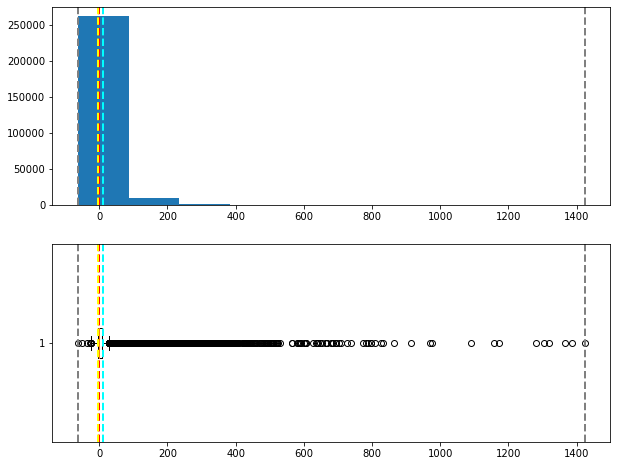

In [53]:
min_del = df_flights["DepDelay"].min()
max_del = df_flights["DepDelay"].max()
mean_del = df_flights["DepDelay"].mean()
std_del = df_flights["DepDelay"].std()
mode_del = df_flights["DepDelay"].mode()[0]
median_del = df_flights["DepDelay"].median()

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_del,
                                                                                        mean_del,
                                                                                        median_del,
                                                                                        mode_del,
                                                                                        max_del))
fix, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].hist(df_flights["DepDelay"])
ax[1].boxplot(df_flights["DepDelay"], vert=False)

def show_stats(ax):
    ax.axvline(x=min_del, color = 'gray', linestyle='dashed', linewidth = 2)
    ax.axvline(x=mean_del, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax.axvline(x=median_del, color = 'red', linestyle='dashed', linewidth = 2)
    ax.axvline(x=mode_del, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax.axvline(x=max_del, color = 'gray', linestyle='dashed', linewidth = 2)
    
    
    
show_stats(ax[0])
show_stats(ax[1])

<AxesSubplot:ylabel='Density'>

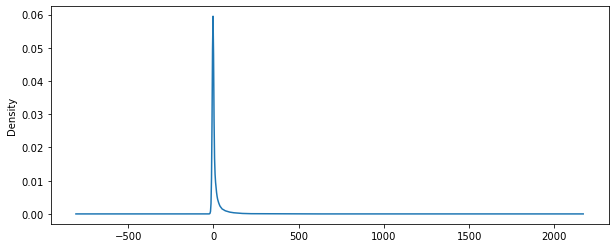

In [57]:
fig = plt.figure(figsize=(10,4))

df_flights["DepDelay"].plot.density()